In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Загрузка данных
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target

In [ ]:
# Шаг 1: Первичный анализ данных
print("Статистические характеристики набора данных:")
print(df.describe())

Статистические характеристики набора данных:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          MEDV  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532    

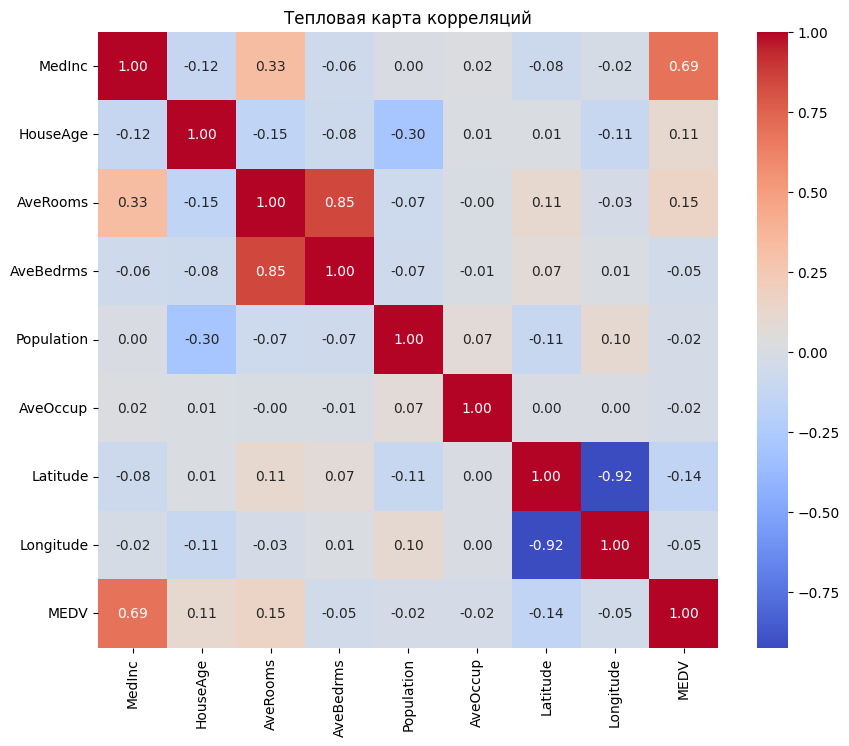

In [ ]:
# Построение тепловой карты корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Тепловая карта корреляций")
plt.show()

In [ ]:
# Построение парных отношений
sns.pairplot(df, diag_kind='kde')
plt.show()

In [ ]:
# Шаг 2: Обучение линейной регрессии
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Линейная регрессия без масштабирования
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Линейная регрессия без масштабирования:")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

NameError: name 'LinearRegression' is not defined

In [ ]:
# Масштабирование данных
scalers = [StandardScaler(), MinMaxScaler()]
scaler_names = ['StandardScaler', 'MinMaxScaler']

In [ ]:
for scaler, name in zip(scalers, scaler_names):
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    lr.fit(scaled_X_train, y_train)
    y_pred_scaled = lr.predict(scaled_X_test)

    print(f"Линейная регрессия с {name}:")
    print(f"R2 Score: {r2_score(y_test, y_pred_scaled):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_scaled):.2f}")

Линейная регрессия с StandardScaler:
R2 Score: 0.58
Mean Squared Error: 0.56
Линейная регрессия с MinMaxScaler:
R2 Score: 0.58
Mean Squared Error: 0.56


In [ ]:
# Шаг 3: Применение модели "Деревья"
rfc = RandomForestClassifier(random_state=42)
y_train_class = (y_train > y_train.mean()).astype(int)  # Бинаризация целевой переменной
y_test_class = (y_test > y_test.mean()).astype(int)

rfc.fit(X_train, y_train_class)
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
important_features = feature_importances[feature_importances > 0.1]

In [ ]:
# Повторное обучение с важными признаками
X_train_imp = X_train[important_features.index]
X_test_imp = X_test[important_features.index]

rfc.fit(X_train_imp, y_train_class)
y_pred_class = rfc.predict(X_test_imp)

print("Точность модели с важными признаками:")
print(f"Accuracy: {rfc.score(X_test_imp, y_test_class):.2f}")

Точность модели с важными признаками:
Accuracy: 0.89


In [ ]:
# Шаг 4: Генерация новых признаков
df['Rooms_per_Household'] = df['AveRooms'] / df['Households']
df['Bedrooms_per_Room'] = df['AveBedrms'] / df['AveRooms']
df['Population_per_Household'] = df['Population'] / df['Households']


KeyError: 'Households'

In [ ]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr.fit(X_train, y_train)
y_pred_new_features = lr.predict(X_test)


In [ ]:
print("Линейная регрессия с новыми признаками:")
print(f"R2 Score: {r2_score(y_test, y_pred_new_features):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_new_features):.2f}")

Линейная регрессия с новыми признаками:
R2 Score: 0.58
Mean Squared Error: 0.56
